# Final Project
## Date: 06/18/2021
## Team: Bryce Randolph, Jeannie Davis, Harsandeep Singh, Kevin Robell

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsRegressor #Doesn't seem to be used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')   # 'talk' for slightly larger

## What we are going to predict
We want to predict the winner of an NBA game based on the game stats from the 2019 season which is in the HOME_TEAM_WINS column.


## Choice of Dataset
Our dataset is focused on the 2019 season from this dataset of NBA games(games.csv). https://www.kaggle.com/nathanlauga/nba-games. We are choosing to make the program modular enough that other seasons can also be analyzed, but only a single season is chosen at a time to stay within the goals of the project. Drop the games.csv in the same folder as this file to run the following code.

## Predictors
To predict the winner of each game we will use all of the game stats except for the PTS_away and PTS_home columns. In addition, two predictors have been added, the REB_PCT_away and REB_PCT_home columns, based upon the REB_away and REB_home columns as seen below.

#### List of Predictors 
 8   FG_PCT_home       1241 non-null   float64   
 9   FT_PCT_home       1241 non-null   float64   
 10  FG3_PCT_home      1241 non-null   float64   
 11  AST_home          1241 non-null   float64   
 12  REB_home          1241 non-null   float64   
 15  FG_PCT_away       1241 non-null   float64   
 16  FT_PCT_away       1241 non-null   float64   
 17  FG3_PCT_away      1241 non-null   float64   
 18  AST_away          1241 non-null   float64   
 19  REB_away          1241 non-null   float64   
 21  REB_PCT_away      1241 non-null   float64   
 22  REB_PCT_home      1241 non-null   float64   

## Reading the Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/harsandeep1/cst383-final-project/main/games.csv")
df = df[df.SEASON == 2019]

## Initial Exploration 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 1206 to 17677
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     1241 non-null   object 
 1   GAME_ID           1241 non-null   int64  
 2   GAME_STATUS_TEXT  1241 non-null   object 
 3   HOME_TEAM_ID      1241 non-null   int64  
 4   VISITOR_TEAM_ID   1241 non-null   int64  
 5   SEASON            1241 non-null   int64  
 6   TEAM_ID_home      1241 non-null   int64  
 7   PTS_home          1241 non-null   float64
 8   FG_PCT_home       1241 non-null   float64
 9   FT_PCT_home       1241 non-null   float64
 10  FG3_PCT_home      1241 non-null   float64
 11  AST_home          1241 non-null   float64
 12  REB_home          1241 non-null   float64
 13  TEAM_ID_away      1241 non-null   int64  
 14  PTS_away          1241 non-null   float64
 15  FG_PCT_away       1241 non-null   float64
 16  FT_PCT_away       1241 non-null   floa

In [5]:
df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,1.241000e+03,1.241000e+03,1.241000e+03,1241.0,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,2.247261e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,112.274778,0.463043,0.769757,0.359782,24.710717,45.438356,1.610613e+09,110.466559,0.455907,0.771137,0.353089,23.791297,44.197421,0.536664
std,5.922460e+06,8.505847e+00,8.505253e+00,0.0,8.505847e+00,12.781012,0.056152,0.098386,0.085668,4.850270,6.845032,8.505253e+00,12.447984,0.054403,0.102825,0.084250,4.851417,6.680293,0.498855
min,1.190000e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,68.000000,0.269000,0.400000,0.118000,11.000000,24.000000,1.610613e+09,70.000000,0.308000,0.375000,0.094000,10.000000,25.000000,0.000000
25%,2.190021e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,104.000000,0.425000,0.706000,0.300000,21.000000,41.000000,1.610613e+09,102.000000,0.418000,0.706000,0.297000,20.000000,40.000000,0.000000
50%,2.190052e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,112.000000,0.462000,0.778000,0.359000,25.000000,45.000000,1.610613e+09,110.000000,0.455000,0.774000,0.353000,24.000000,44.000000,1.000000
75%,2.190083e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,120.000000,0.505000,0.838000,0.417000,28.000000,50.000000,1.610613e+09,119.000000,0.494000,0.840000,0.406000,27.000000,48.000000,1.000000
max,5.190011e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,158.000000,0.633000,1.000000,0.629000,43.000000,67.000000,1.610613e+09,159.000000,0.674000,1.000000,0.680000,40.000000,65.000000,1.000000


In [6]:
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,25.0,41.0,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0
1207,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,21.0,41.0,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0
1208,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,18.0,39.0,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0
1209,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,25.0,37.0,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1
1210,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,32.0,44.0,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1


## Initial preprocessing and cleaning

The dataset doesn't have any na values so it's unnecessary to drop columns for that reason. All games are final which means we don't need to drop partially completed games. At the same time, the columns GAME_DATE_EST, GAME_ID, GAME_STATUS_TEXT, HOME_TEAM_ID, VISITOR_TEAM_ID, SEASON, TEAM_ID_home, PTS_home, TEAM_ID_away, and PTS_away aren't used so they will all be dropped.

In [7]:
df.isna().sum() # This also Shows that data doesn't have NA values.

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [8]:
col_to_drop = ['GAME_ID', 'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'PTS_home', 'PTS_away', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'TEAM_ID_away']
df.drop(col_to_drop, axis = 1, inplace=True)  #Dropping the useless/not relevant columns. 

In [9]:
#Create new rebound percentage columns
df['REB_PCT_away'] = df['REB_away'] / (df['REB_away'] + df['REB_home'])
df['REB_PCT_home'] = df['REB_home'] / (df['REB_away'] + df['REB_home'])

In [10]:
#Move REB_PCT_away and REB_PCT_home columns to front of df leaving HOME_TEAM_WINS
#at the back because that is what we are trying to predict.
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

In [11]:
df.head()

,REB_PCT_away,REB_PCT_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,0.528736,0.471264,0.443,0.591,0.357,25.0,41.0,0.483,0.643,0.314,23.0,46.0,0
1207,0.460526,0.539474,0.463,0.857,0.368,21.0,41.0,0.458,0.955,0.424,26.0,35.0,0
1208,0.518519,0.481481,0.427,0.808,0.344,18.0,39.0,0.443,0.857,0.359,25.0,42.0,0
1209,0.537500,0.462500,0.513,0.913,0.353,25.0,37.0,0.430,0.759,0.333,23.0,43.0,1
1210,0.456790,0.543210,0.505,0.588,0.340,32.0,44.0,0.507,0.912,0.407,29.0,37.0,1


## Exploration and Visualization
We took a look at the data to see which predictors correlated well with the outcome of the game and created some graphs to look at how certain predictors factored into who ended up winning.

In [12]:
df.info() # Basic data exploration

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 1206 to 17677
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REB_PCT_away    1241 non-null   float64
 1   REB_PCT_home    1241 non-null   float64
 2   FG_PCT_home     1241 non-null   float64
 3   FT_PCT_home     1241 non-null   float64
 4   FG3_PCT_home    1241 non-null   float64
 5   AST_home        1241 non-null   float64
 6   REB_home        1241 non-null   float64
 7   FG_PCT_away     1241 non-null   float64
 8   FT_PCT_away     1241 non-null   float64
 9   FG3_PCT_away    1241 non-null   float64
 10  AST_away        1241 non-null   float64
 11  REB_away        1241 non-null   float64
 12  HOME_TEAM_WINS  1241 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 135.7 KB


In [13]:
df.head()

,REB_PCT_away,REB_PCT_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,0.528736,0.471264,0.443,0.591,0.357,25.0,41.0,0.483,0.643,0.314,23.0,46.0,0
1207,0.460526,0.539474,0.463,0.857,0.368,21.0,41.0,0.458,0.955,0.424,26.0,35.0,0
1208,0.518519,0.481481,0.427,0.808,0.344,18.0,39.0,0.443,0.857,0.359,25.0,42.0,0
1209,0.537500,0.462500,0.513,0.913,0.353,25.0,37.0,0.430,0.759,0.333,23.0,43.0,1
1210,0.456790,0.543210,0.505,0.588,0.340,32.0,44.0,0.507,0.912,0.407,29.0,37.0,1


### Exploratory Graphs

##### Histogram plots

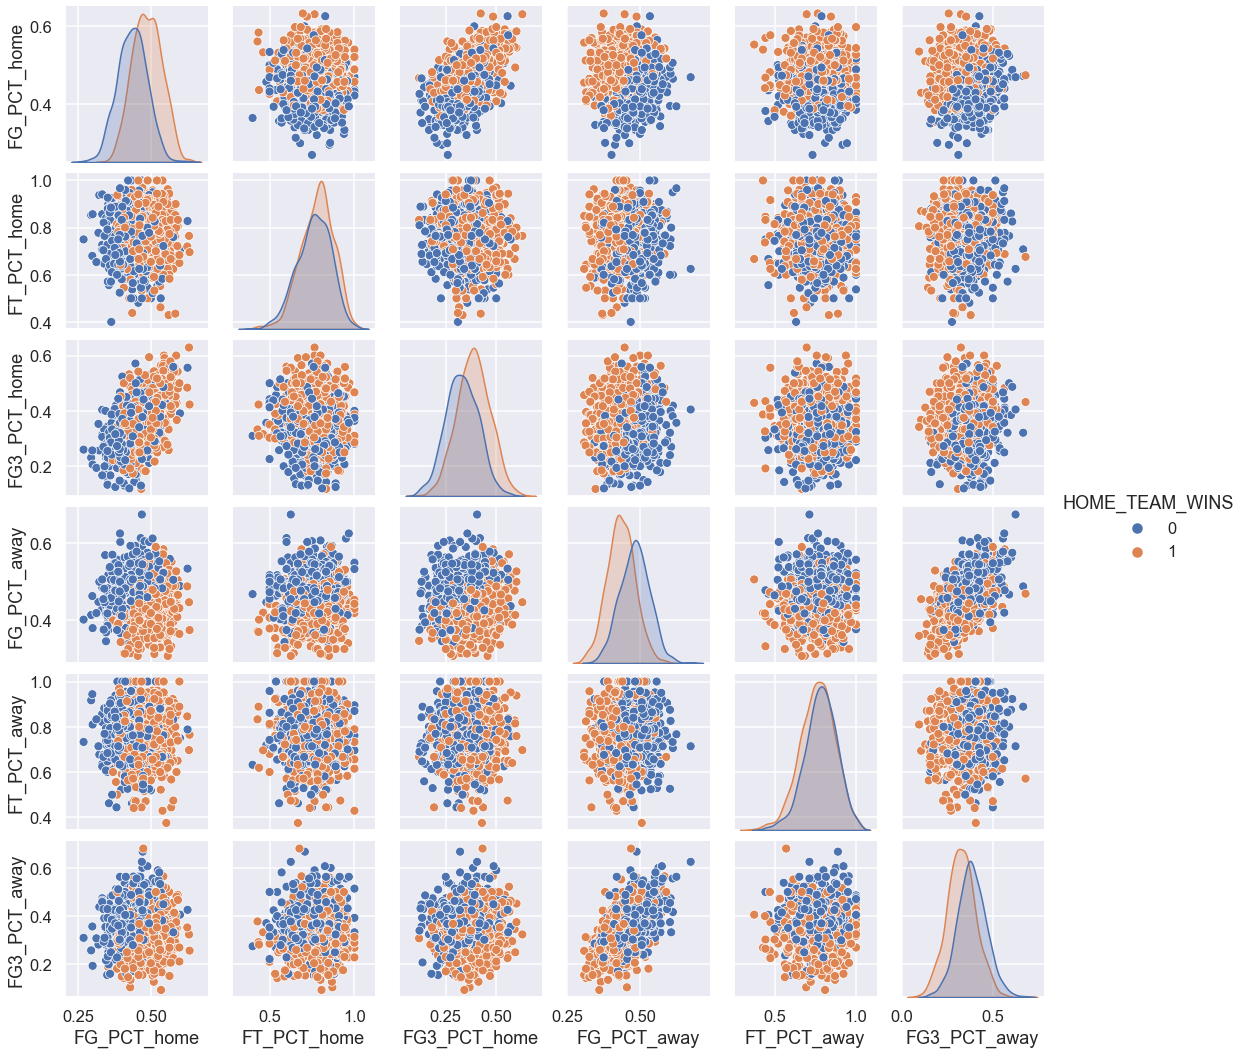

In [74]:
# #This pairplot shows the relationship between different field goal percentage stats.
# sns.pairplot(df, hue='HOME_TEAM_WINS', vars=['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away'])
# #This might take some time to load based upon the size of a dataset. Comment out for now.

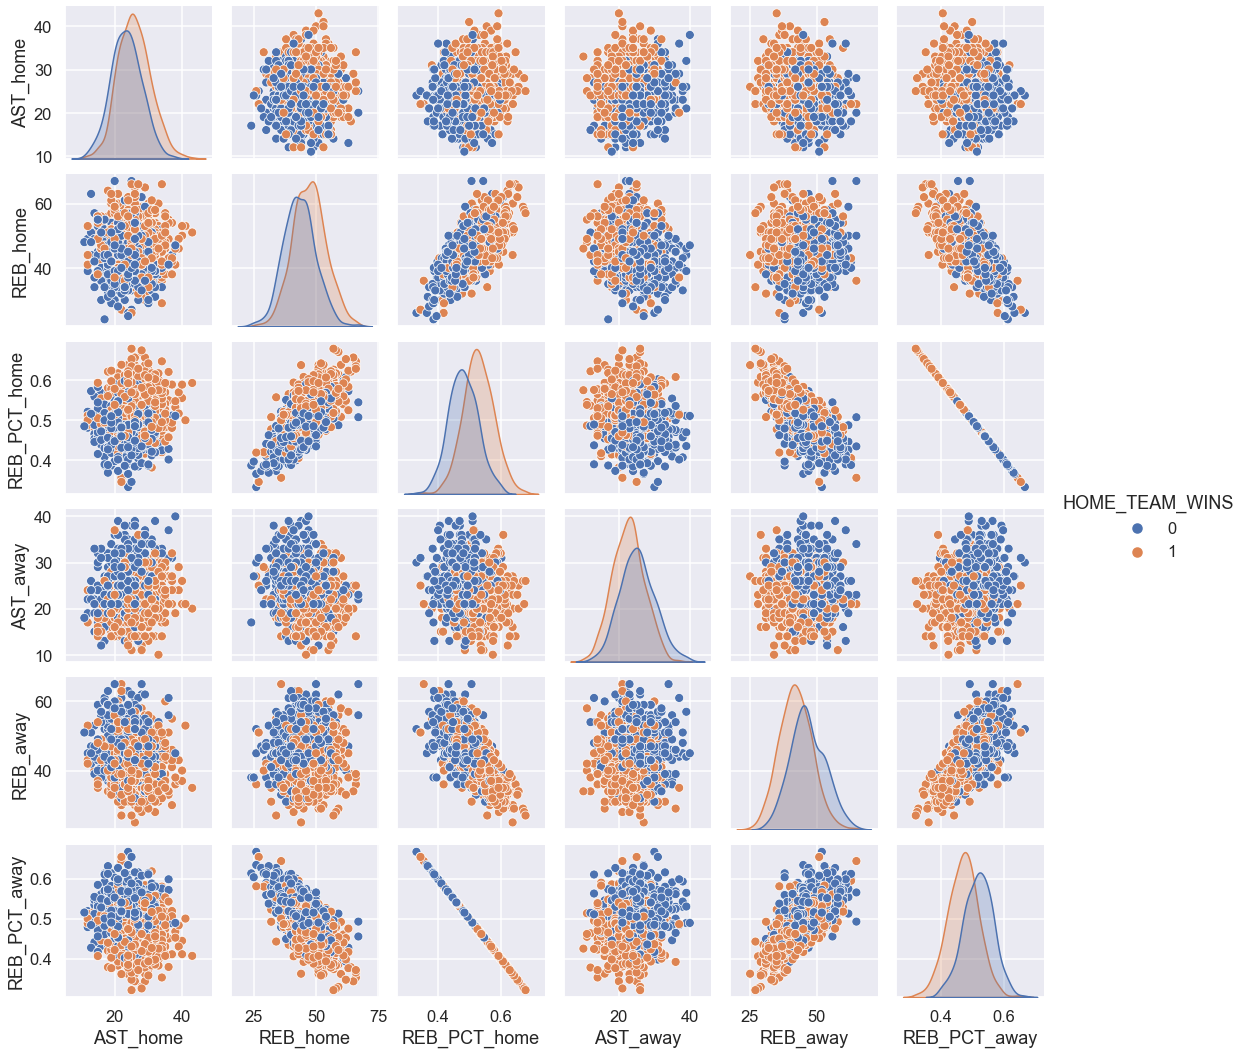

In [75]:
# #This pairplot shows the relationship between different rebounding and assist stats.
# sns.pairplot(df, hue='HOME_TEAM_WINS', vars=['AST_home', 'REB_home', 'REB_PCT_home', 'AST_away', 'REB_away', 'REB_PCT_away'])
# #This might take some time to load based upon the size of a dataset. Comment out for now.

##### Heatmap Plot

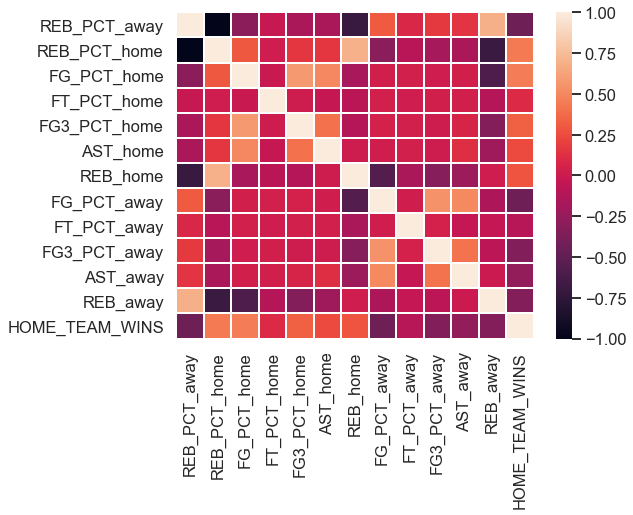

In [19]:
sns.heatmap(df.corr(),linecolor='white',linewidths=1);

## Machine Learning

#### Training a Linear Regression Model 
Training out the regression model! We are splitting up our data into an X array and y array. The X array contains the features to train on, and the y array with the target variable. 
##### X and y arrays

In [48]:
df.columns

Index(['REB_PCT_away', 'REB_PCT_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [49]:
X = df.drop('HOME_TEAM_WINS',axis=1)
y = df['HOME_TEAM_WINS']

##### Train Test Split
Splitting the data into a training set and a testing set. We will train out model on the training set first and then use the test set to evaluate the model.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

##### Creating and Training the Model

In [51]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

##### Model Evaluation
Evaluating the model by checking out the values of coefficients.

In [52]:
# print the intercept
print(lm.intercept_)

0.7217445816277751


In [53]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
REB_PCT_away,0.907416
REB_PCT_home,-0.907416
FG_PCT_home,2.730154
FT_PCT_home,0.584855
FG3_PCT_home,0.687208
AST_home,0.003527
REB_home,0.019119
FG_PCT_away,-2.885775
FT_PCT_away,-0.508168
FG3_PCT_away,-0.795845


##### Predictions from our Model

In [54]:
predictions = lm.predict(X_test)

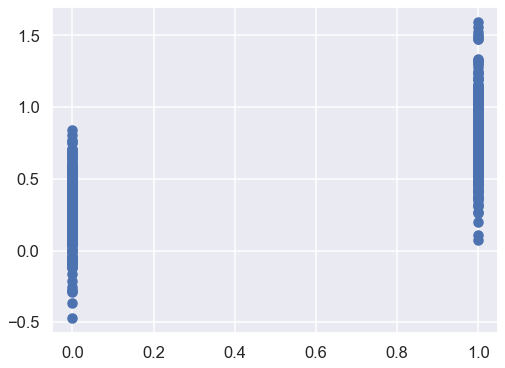

In [55]:
plt.scatter(y_test,predictions)

##### Residual Histogram

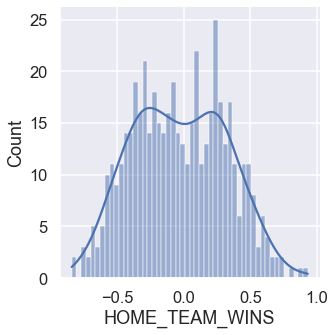

In [56]:
sns.displot((y_test-predictions),bins=50, kde=True)

#### Regression Evaluation Metrics

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2973998075443468
MSE: 0.12337038825292229
RMSE: 0.351241210926227


#### KNN - Standardize the Variables

In [58]:
df.head()

,REB_PCT_away,REB_PCT_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,0.528736,0.471264,0.443,0.591,0.357,25.0,41.0,0.483,0.643,0.314,23.0,46.0,0
1207,0.460526,0.539474,0.463,0.857,0.368,21.0,41.0,0.458,0.955,0.424,26.0,35.0,0
1208,0.518519,0.481481,0.427,0.808,0.344,18.0,39.0,0.443,0.857,0.359,25.0,42.0,0
1209,0.537500,0.462500,0.513,0.913,0.353,25.0,37.0,0.430,0.759,0.333,23.0,43.0,1
1210,0.456790,0.543210,0.505,0.588,0.340,32.0,44.0,0.507,0.912,0.407,29.0,37.0,1


In [59]:
scaler = StandardScaler()
scaler.fit(df.drop('HOME_TEAM_WINS',axis=1))

StandardScaler()

In [60]:
scaled_features = scaler.transform(df.drop('HOME_TEAM_WINS',axis=1))
scaled_features

array([[ 6.67558413e-01, -6.67558413e-01, -3.57080636e-01, ...,
        -4.64158091e-01, -1.63172193e-01,  2.69944034e-01],
       [-6.13391415e-01,  6.13391415e-01, -7.60876200e-04, ...,
         8.42010142e-01,  4.55453137e-01, -1.37735413e+00],
       [ 4.75684184e-01, -4.75684184e-01, -6.42136444e-01, ...,
         7.01834590e-02,  2.49244694e-01, -3.29073482e-01],
       ...,
       [ 8.83416920e-01, -8.83416920e-01, -1.33695998e+00, ...,
         9.39319724e-02,  1.07407847e+00,  4.19698413e-01],
       [ 4.06818433e-01, -4.06818433e-01, -1.40822393e+00, ...,
        -1.47346991e+00, -5.75589079e-01,  1.16847031e+00],
       [ 2.20099482e+00, -2.20099482e+00,  5.51534752e-01, ...,
         2.00800282e-01,  4.55453137e-01,  4.19698413e-01]])

In [61]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,REB_PCT_away,REB_PCT_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,0.667558,-0.667558,-0.357081,-1.817627,-0.032483,0.059667,-0.648667,0.498215,-1.246667,-0.464158,-0.163172,0.269944
1,-0.613391,0.613391,-0.000761,0.887105,0.095971,-0.765362,-0.648667,0.038496,1.788835,0.842010,0.455453,-1.377354
2,0.475684,-0.475684,-0.642136,0.388865,-0.184292,-1.384134,-0.940967,-0.237335,0.835376,0.070183,0.249245,-0.329073
3,0.832151,-0.832151,0.890039,1.456522,-0.079193,0.059667,-1.233268,-0.476389,-0.118083,-0.238547,-0.163172,-0.179319
4,-0.683556,0.683556,0.747511,-1.848132,-0.231003,1.503467,-0.210216,0.939546,1.370481,0.640148,1.074078,-1.077845


#### Train Test Split


In [62]:
X = df_feat
y = df['HOME_TEAM_WINS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### Using KNN


In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

#### Predictions and Evaluations
 Evaluating the KNN model

In [64]:
print(confusion_matrix(y_test,pred))

[[176  60]
 [ 67 194]]


In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       236
           1       0.76      0.74      0.75       261

    accuracy                           0.74       497
   macro avg       0.74      0.74      0.74       497
weighted avg       0.75      0.74      0.74       497



#### Choosing a K Value
Using elbow method to pick a good K value

In [66]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

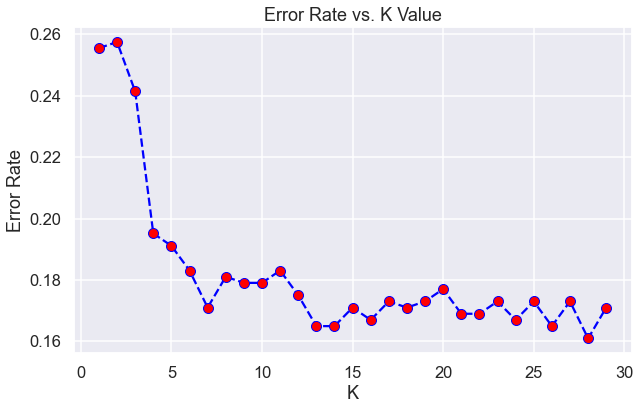

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that around K>16 the error rate just tends to hover around 0.16-0.18 Let's check the classification report with that K value.

In [68]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[176  60]
 [ 67 194]]


              precision    recall  f1-score   support

           0       0.72      0.75      0.73       236
           1       0.76      0.74      0.75       261

    accuracy                           0.74       497
   macro avg       0.74      0.74      0.74       497
weighted avg       0.75      0.74      0.74       497



In [69]:
# NOW WITH K=16
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=16')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=16


[[190  46]
 [ 37 224]]


              precision    recall  f1-score   support

           0       0.84      0.81      0.82       236
           1       0.83      0.86      0.84       261

    accuracy                           0.83       497
   macro avg       0.83      0.83      0.83       497
weighted avg       0.83      0.83      0.83       497

